In [1]:
# import libraries

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [ ]:
# importing dataset(csv file)
data=pd.read_csv(r"yahoo_stock.csv")

In [3]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


In [6]:
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2015-11-23 to 2020-11-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1825 non-null   float64
 1   Low        1825 non-null   float64
 2   Open       1825 non-null   float64
 3   Close      1825 non-null   float64
 4   Volume     1825 non-null   float64
 5   Adj Close  1825 non-null   float64
dtypes: float64(6)
memory usage: 99.8 KB


In [7]:
stock_data=data['Close']
stock_data.head()

Date
2015-11-23    2086.590088
2015-11-24    2089.139893
2015-11-25    2088.870117
2015-11-26    2088.870117
2015-11-27    2090.110107
Name: Close, dtype: float64

# split the data for training and testing 

In [10]:
train_size = int(len(stock_data)*0.8)
train_size

1460

In [11]:
train = stock_data [:train_size]
test= stock_data[train_size:]

# 4 model forecasting  

In [16]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

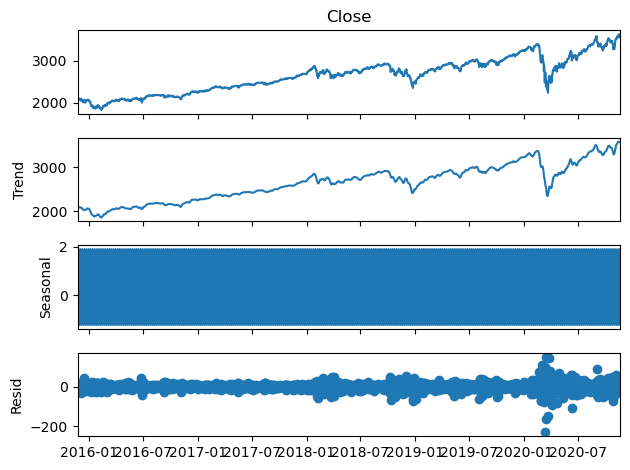

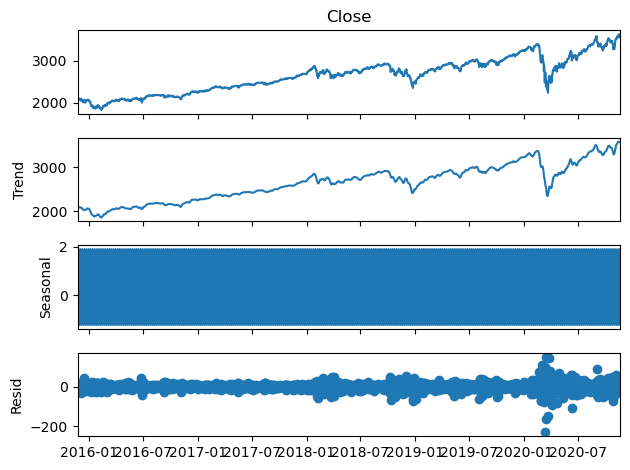

In [20]:
sd=seasonal_decompose(stock_data ,model='additive')
sd.plot()

# plot ACF and PACF plot 

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 

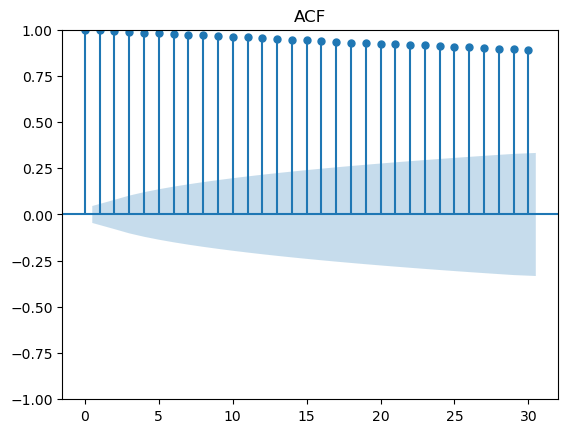

In [27]:
plot_acf(stock_data,lags=30)
plt.title ("ACF")
plt.show()

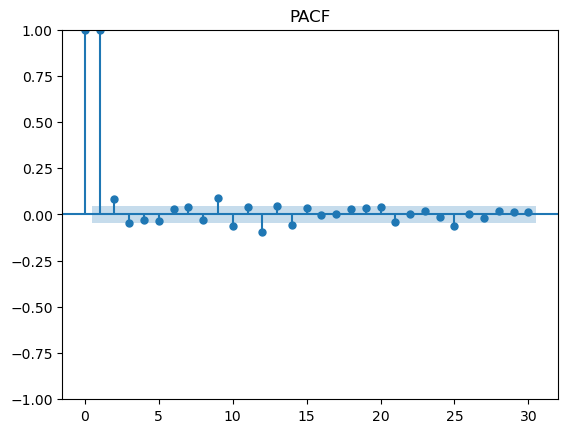

In [28]:
plot_pacf(stock_data,lags=30)
plt.title ("PACF")
plt.show()

# train ARIMA model first

In [30]:
p,d,q=1,1,1
model_arima=ARIMA(train,order=(p,d,q))
result_arima=model_arima.fit()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


# Forecasting using ARIMA model

In [33]:
forecast_arima = result_arima.predict(start=len(train),end=len(train)+len(test)-1,typ='levels') 

# train the SARIMA model

In [35]:
p,d,q,P,D,Q,s=1,1,1,1,1,1,12
model_sarima=SARIMAX(train,order=(p,d,q),seasonal_order=(P,D,Q,s))

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [36]:
result_sarima=model_sarima.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.38324D+00    |proj g|=  5.33766D-02

At iterate    5    f=  4.33651D+00    |proj g|=  2.90937D-02

At iterate   10    f=  4.24844D+00    |proj g|=  7.12939D-04

At iterate   15    f=  4.24844D+00    |proj g|=  7.91515D-04

At iterate   20    f=  4.24844D+00    |proj g|=  6.02052D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   6.021D-06   4.248D+00
  F =   4.2484389027749438     

CONVERG

# Forecasting using SARIMA model

In [39]:
forecast_sarima=result_sarima.predict(start=len(train),end=len(train)+len(test)-1,typ='levels')

# plot the ARIMA and SARIMA forecast

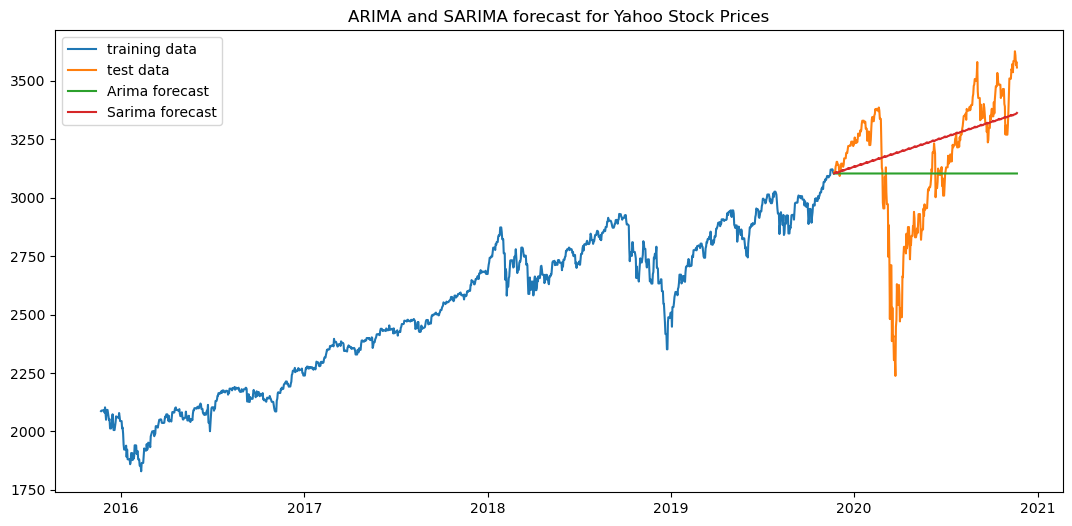

In [41]:
plt.figure(figsize=(13,6))
plt.plot(train,label='training data')
plt.plot(test,label='test data')
plt.plot(forecast_arima,label='Arima forecast')
plt.plot(forecast_sarima,label='Sarima forecast')
plt.title('ARIMA and SARIMA forecast for Yahoo Stock Prices')
plt.legend()
plt.show()